## **KNN算法**

K近邻算法(K-Nearest Neighbors, KNN), 是一种基本的分类与回归算法, 数据监督学习算法, 其核心思想是通过计算给定样本与数据集中所有样本的距离, 找到距离最近的K个样本, 然后根据这些样本的类别或值来预测当前样本的类别或值.

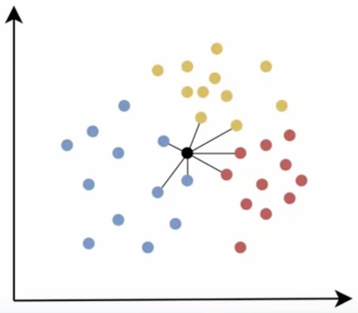

#### 原理
1. 计算距离: 计算待分类样本与训练集中每个样本的距离
2. 选择K个近邻: 根据计算的距离, 选取距离最近的K个样本
3. 投票或者平均:
    1. 分类任务: 根据K个近邻各类别的数量, 将待分类样本归为数量最多的类别
    2. 回归任务: 取K个近邻的平均值作为预测结果

#### 关键参数
距离度量的方法: 选择合适的距离计算方法, 常见的距离度量方法有: 欧式距离, 曼哈顿距离, 切比雪夫距离, 闵可夫斯基距离等.
K值: 超参数, K值的选择对结果影响很大, K值过小容易过拟合, K值过大容易欠拟合.

#### 优缺点
优点:
- 简单直观, 易于理解和实现
- 无需训练, **直接利用训练数据进行预测**

缺点:
- 计算量大, 尤其是在训练集较大时
- 对噪声数据较为敏感

#### KNN分类问题

In [21]:
# 导入依赖库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # KNN做分类

In [22]:
# 准备数据
X = np.array([[2, 1], [3, 1], [1, 4], [2, 6]])
y = np.array([0, 0, 1, 1])

想象这样一个问题, 假设k = 2, 训练集中最近的两个样本一个属于类0, 一个属于类1, 那么预测的结果就是判断为哪个类都行就会判断为先找到的类, 那么此时我们希望根据距离来断定属于哪个类, 也就是增价一个权值, 通过设置模型的参数weights = 'distance'来定义权值的计算方式.默认是uniform.

In [23]:
# 定义KNN模型
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
# 训练模型(本质上其实并没有训练参数的过程)
knn.fit(X, y)
# 预测结果
x = np.array([[4, 9]])
x_class = knn.predict(x)

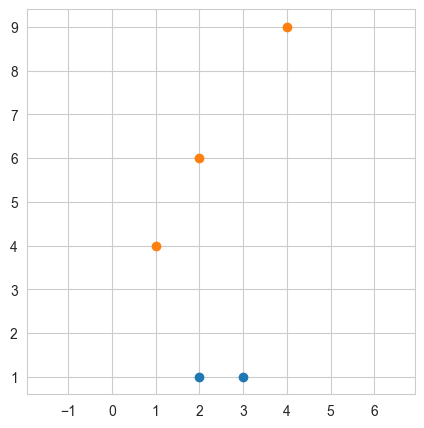

In [24]:
# 画图
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis('equal')
X1 = X[y == 0]
X2 = X[y == 1]
colors = ['C0', 'C1']
plt.scatter(X1[:, 0], X1[:, 1], c = colors[0])
plt.scatter(X2[:, 0], X2[:, 1], c = colors[1])
x_colore = colors[0] if x_class == 0 else colors[1]
plt.scatter(x[:, 0], x[:, 1], c=x_colore)
plt.show()

#### KNN回归问题

In [25]:
from sklearn.neighbors import KNeighborsRegressor   # 引入KNN做回归

In [26]:
# 构建数据
X = np.array([[2, 1], [3, 1], [1, 4], [2, 6]])
y = np.array([0.5, 0.33, 4, 3])

In [28]:
knn = KNeighborsRegressor(n_neighbors=2, weights='distance')
knn.fit(X, y)
x = np.array([[4, 9]])
print(knn.predict(x))

[3.38208553]
